## Random Forest  
<br/>

#### Random Forest Algorithm is another popular machine learning technique used in regression and classification both now why is it called random forest well the forest has trees and a tree in machine learning world means a decision tree.

In this example we're going to use 'Sklearns digits data set' to make a classification usign random forest so that data set basically contains the images of handwritten characters and we're trying to do is just classify into one of these 10 categories where there is a digit from 0 to 10, so that's what we will do.

![Image1](image1.png)
![Image2](image2.png)

In [1]:
# Libraries
import pandas as pd
from sklearn.datasets import load_digits

# Loaded the digits data set from sklearn.datasets 
digits = load_digits() 

In [2]:
# Properties of this data set it has the real 'data' and the 'target'
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

<Figure size 432x288 with 0 Axes>

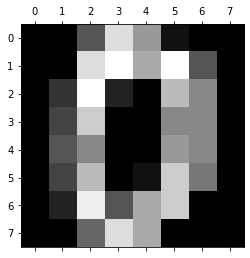

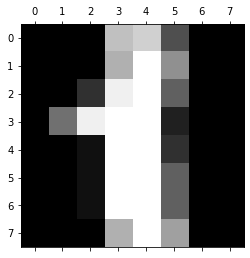

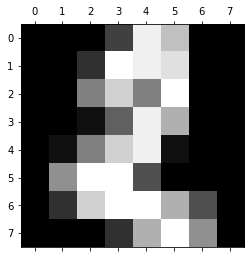

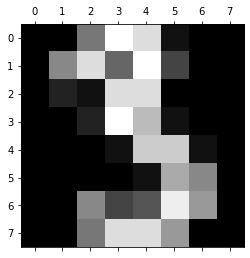

In [3]:
# Use matplotlib to visualize the data
%matplotlib inline
import matplotlib.pyplot as plt

# Print 4 digits, so we have basically hand written characters which is like 8 by 8 pixels array
plt.gray() 
for i in range(4):
    plt.matshow(digits.images[i]) 

In [4]:
# Create pandas data frame from 'digits' data set 
# 'data' is a two dimensional array of numbers
df = pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [5]:
# Append 'target' into data frame in new column
df['target'] = digits.target

In [6]:
# Display 12 rows with target
df[0:12]

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
5,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0,5
6,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,9.0,15.0,11.0,3.0,0.0,6
7,0.0,0.0,7.0,8.0,13.0,16.0,15.0,1.0,0.0,0.0,...,0.0,0.0,0.0,13.0,5.0,0.0,0.0,0.0,0.0,7
8,0.0,0.0,9.0,14.0,8.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,16.0,15.0,11.0,1.0,0.0,8
9,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0,9


In [7]:
# X: has 0 to 63 columns / 'data'
X = df.drop('target',axis='columns')

# y: has target column
y = df.target

In [8]:
# Use 'train_test_split' 
from sklearn.model_selection import train_test_split
# test_size=0.2 : means 20% of my sample is test data and 80% are training data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [9]:
# Now use the random forest classifier to train the model 
from sklearn.ensemble import RandomForestClassifier
# Create model with random forest classifier 
# 20 random trees 
model = RandomForestClassifier(n_estimators=20)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [10]:
# The accuracy base is up to 93%
model.score(X_test, y_test)

0.9611111111111111

In [23]:
# Get Y Predict
y_predicted = model.predict(X_test)

In [24]:
# Create Matrix to Graph
from sklearn.metrics import confusion_matrix
# y_test: truth data
# y_predicted: predicted data
cm = confusion_matrix(y_test, y_predicted)
cm

array([[36,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 36,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 37,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 41,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 29,  0,  0,  3,  0,  0],
       [ 1,  0,  0,  0,  0, 38,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 36,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 36,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 27,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  0, 34]], dtype=int64)

Text(69.0, 0.5, 'Truth')

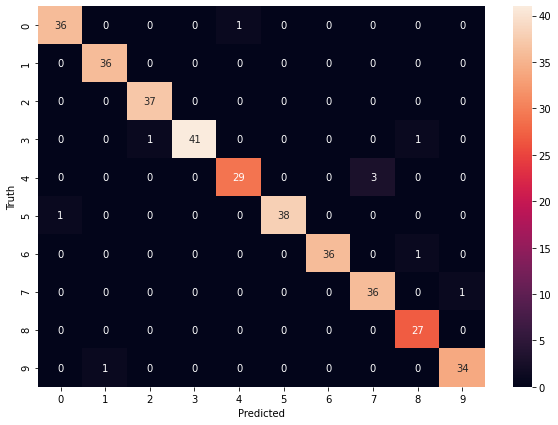

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')